#Algae Dataset

This dataset offers a comprehensive repository of environmental parameters, encompassing invaluable data pertaining to the population of algae—an indispensable cornerstone of aquatic ecosystems. The dataset unfolds with an array of meticulously collected columns, each of which serves as a vital piece in the intricate puzzle of aquatic biology:

##Set up

###Imports

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
import time


###File Storage

In [ ]:
drive.mount('/content/gdrive') # connection the google drive
#reads from the file path the milk grading file
df = pd.read_csv("/content/gdrive/MyDrive/aaDataScience/algeas.csv")
#displays the dataframe
df

Mounted at /content/gdrive


Light  Nitrate  Iron  Phosphate  Temperature    pH   CO2  Population
0     1011.00     1.11  0.17       0.08        23.39  7.27  9.22     4736.51
1     1206.50     3.29  0.14       0.04        14.74  7.94  9.59     4677.34
2     1450.63     1.67  0.04       0.02        28.58  7.35  4.46     3388.85
3     1158.40     2.48  0.09       0.06        27.18  7.43  6.34     4899.17
4     1159.92     2.15  0.15       0.08        22.52  7.92  6.46     4974.25
...       ...      ...   ...        ...          ...   ...   ...         ...
9779   368.58     4.94  0.08       0.02        14.34  7.61  3.21     2920.22
9780  1733.12     5.25  0.01       0.06        22.20  7.74  9.91     2093.47
9781  1898.45     1.90  0.11       0.05        18.53  7.39  7.78      777.25
9782  1832.10     6.08  0.15       0.13        22.63  7.04  4.77     1607.65
9783   467.72     7.71  0.12       0.06        11.52  7.37  3.05     3615.62

[9784 rows x 8 columns]

In [ ]:
#splits data into x and y
X = df.drop(columns = ["Population"])
y = df["Population"]

###Columns

In [ ]:
df.columns

Index(['Light', 'Nitrate', 'Iron', 'Phosphate', 'Temperature', 'pH', 'CO2',
       'Population'],
      dtype='object')

1.   ***Light (μmol photons/m²/s)***: This particular column quantifies the luminous intensity in micromoles of photons per square meter per second. The availability of light, as elucidated herein, emerges as a pivotal determinant profoundly shaping the growth patterns and spatial distribution of algae within aquatic realms.
2.   ***Nitrate (mg/L)***: The concentration of nitrate, meticulously gauged in milligrams per liter (mg/L), stands as a cardinal parameter instrumental in assessing the nutritional landscape of water bodies. Its eminent role in modulating algal proliferation casts it in the role of a linchpin variable in the exploration of algal populations.
3. ***Phosphate (mg/L)***: Echoing the significance of nutrient dynamics, the column denoting phosphate concentration, similarly quantified in milligrams per liter (mg/L), assumes a prominent stance. This parameter's sway over algal growth underscores its relevance in comprehending the nutrient intricacies inherent in the ecosystem.
4. ***Iron (mg/L)***: The presence of iron, quantified in milligrams per liter (mg/L), exerts a pronounced influence on the flourishing of algae. Algae, in their quest for photosynthetic sustenance, demand iron—a fact that elevates the status of this column to one of paramount importance in the evaluation of micronutrient availability.
5. ***Temperature (°C)***: Temperature, meticulously documented in degrees Celsius (°C), stands as a foundational environmental factor. It exerts a profound sway over the metabolic rates and seasonal ebb and flow characterizing algae populations.
6. ***pH***: The pH level, acting as a sentinel of acidity or alkalinity, wields considerable power over algae populations. The susceptibility of these organisms to fluctuations in pH amplifies the relevance of this parameter in the quest to fathom their well-being and distribution.
7. ***Carbon Dioxide (CO2) (mg/L)***: The concentration of carbon dioxide, quantified in milligrams per liter (mg/L), occupies a crucial niche in the carbon cycle and exerts an indelible imprint on the rates of algal photosynthesis.
8. ***Population (Algae Population)***: Last but by no means least, this column has its gaze squarely fixed on the population of algae inhabiting the studied milieu. It is the encapsulation of density or abundance, offering insights into the intricate interplay between algae and the array of environmental factors meticulously chronicled in this dataset.


##Data Exploration

###DataFrame Head

In [ ]:
df.head()

Light  Nitrate  Iron  Phosphate  Temperature    pH   CO2  Population
0  1011.00     1.11  0.17       0.08        23.39  7.27  9.22     4736.51
1  1206.50     3.29  0.14       0.04        14.74  7.94  9.59     4677.34
2  1450.63     1.67  0.04       0.02        28.58  7.35  4.46     3388.85
3  1158.40     2.48  0.09       0.06        27.18  7.43  6.34     4899.17
4  1159.92     2.15  0.15       0.08        22.52  7.92  6.46     4974.25

###DataFrame Tail

In [ ]:
df.tail()

Light  Nitrate  Iron  Phosphate  Temperature    pH   CO2  Population
9779   368.58     4.94  0.08       0.02        14.34  7.61  3.21     2920.22
9780  1733.12     5.25  0.01       0.06        22.20  7.74  9.91     2093.47
9781  1898.45     1.90  0.11       0.05        18.53  7.39  7.78      777.25
9782  1832.10     6.08  0.15       0.13        22.63  7.04  4.77     1607.65
9783   467.72     7.71  0.12       0.06        11.52  7.37  3.05     3615.62

###Null Values

In [ ]:
df.isna().sum()

Light          0
Nitrate        0
Iron           0
Phosphate      0
Temperature    0
pH             0
CO2            0
Population     0
dtype: int64

There are no null values in this data so it is unlikley there will be any need for any cleaning.

###Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Light        9784 non-null   float64
 1   Nitrate      9784 non-null   float64
 2   Iron         9784 non-null   float64
 3   Phosphate    9784 non-null   float64
 4   Temperature  9784 non-null   float64
 5   pH           9784 non-null   float64
 6   CO2          9784 non-null   float64
 7   Population   9784 non-null   float64
dtypes: float64(8)
memory usage: 611.6 KB


All data is of the same type which is floating or decimal numbers on a scale verifying that regression based models will have to be used for the predictive models.

###Describe

In [ ]:
df.describe()

Light      Nitrate         Iron    Phosphate  Temperature  \
count  9784.000000  9784.000000  9784.000000  9784.000000  9784.000000   
mean   1026.172916     4.493676     0.102977     0.105244    19.974967   
std     565.252246     2.003815     0.056221     0.054843     5.756035   
min      40.250000     1.000000     0.010000     0.010000    10.000000   
25%     539.925000     2.760000     0.050000     0.060000    14.960000   
50%    1023.780000     4.530000     0.100000     0.110000    20.010000   
75%    1516.085000     6.210000     0.150000     0.150000    25.000000   
max    2009.860000     8.000000     0.200000     0.200000    29.990000   

                pH          CO2   Population  
count  9784.000000  9784.000000  9784.000000  
mean      7.502310     6.008941  3161.595503  
std       0.286528     2.299361  1460.094323  
min       7.000000     2.010000     0.000000  
25%       7.260000     4.040000  2055.460000  
50%       7.500000     6.020000  3565.390000  
75%       7.750000     7.980000  4374.555000  
max       8.000000    10.000000  5250.440000

Describe gives a variety of information relating to the to columns in which relevant columns will be explored further below.

###Mean

In [ ]:
df.mean()

Light          1026.172916
Nitrate           4.493676
Iron              0.102977
Phosphate         0.105244
Temperature      19.974967
pH                7.502310
CO2               6.008941
Population     3161.595503
dtype: float64

###Median

In [ ]:
df.median()

Light          1023.78
Nitrate           4.53
Iron              0.10
Phosphate         0.11
Temperature      20.01
pH                7.50
CO2               6.02
Population     3565.39
dtype: float64

###Mode

In [ ]:
df.mode()

Light  Nitrate  Iron  Phosphate  Temperature    pH  CO2  Population
0   618.43     5.85   0.1       0.16        16.93  7.91  8.7         0.0
1  1772.20      NaN   NaN        NaN        27.42   NaN  NaN         NaN
2      NaN      NaN   NaN        NaN        29.49   NaN  NaN         NaN

The mean and median feature very similar values for their columns suggesting that there is some form of a normal distribution to the data. Without being entirely familiar with the data it is difficult to judge every column but columns like pH and temperature make sense for their values intuitevely. As the data is continous mode is a bad measure of central tendency for some columns but it still aligns somewhat close to values for mean and median.

###Standard Deviation

In [ ]:
df.std()

Light           565.252246
Nitrate           2.003815
Iron              0.056221
Phosphate         0.054843
Temperature       5.756035
pH                0.286528
CO2               2.299361
Population     1460.094323
dtype: float64

Standard deviation shows that for most of the data it is well contained to its mean. The biggest variations are light and population. For population this makes sense as it is the target value for the data. The high value for light could suggest it may have a larger impact than other columns on the population.

###Variance

In [ ]:
df.var()

Light          3.195101e+05
Nitrate        4.015273e+00
Iron           3.160847e-03
Phosphate      3.007750e-03
Temperature    3.313194e+01
pH             8.209856e-02
CO2            5.287062e+00
Population     2.131875e+06
dtype: float64

The variance for the data is quite low so values are close to the mean as shown by the standard deviation.

###Min

In [ ]:
df.min()

Light          40.25
Nitrate         1.00
Iron            0.01
Phosphate       0.01
Temperature    10.00
pH              7.00
CO2             2.01
Population      0.00
dtype: float64

###Max

In [ ]:
df.max()

Light          2009.86
Nitrate           8.00
Iron              0.20
Phosphate         0.20
Temperature      29.99
pH                8.00
CO2              10.00
Population     5250.44
dtype: float64

Examing the max and min values of the data verifies most of the columns are well contained with some being between 1 number and some up to 20 with only light and population featuring the biggest range once again.

##Early Visualisations

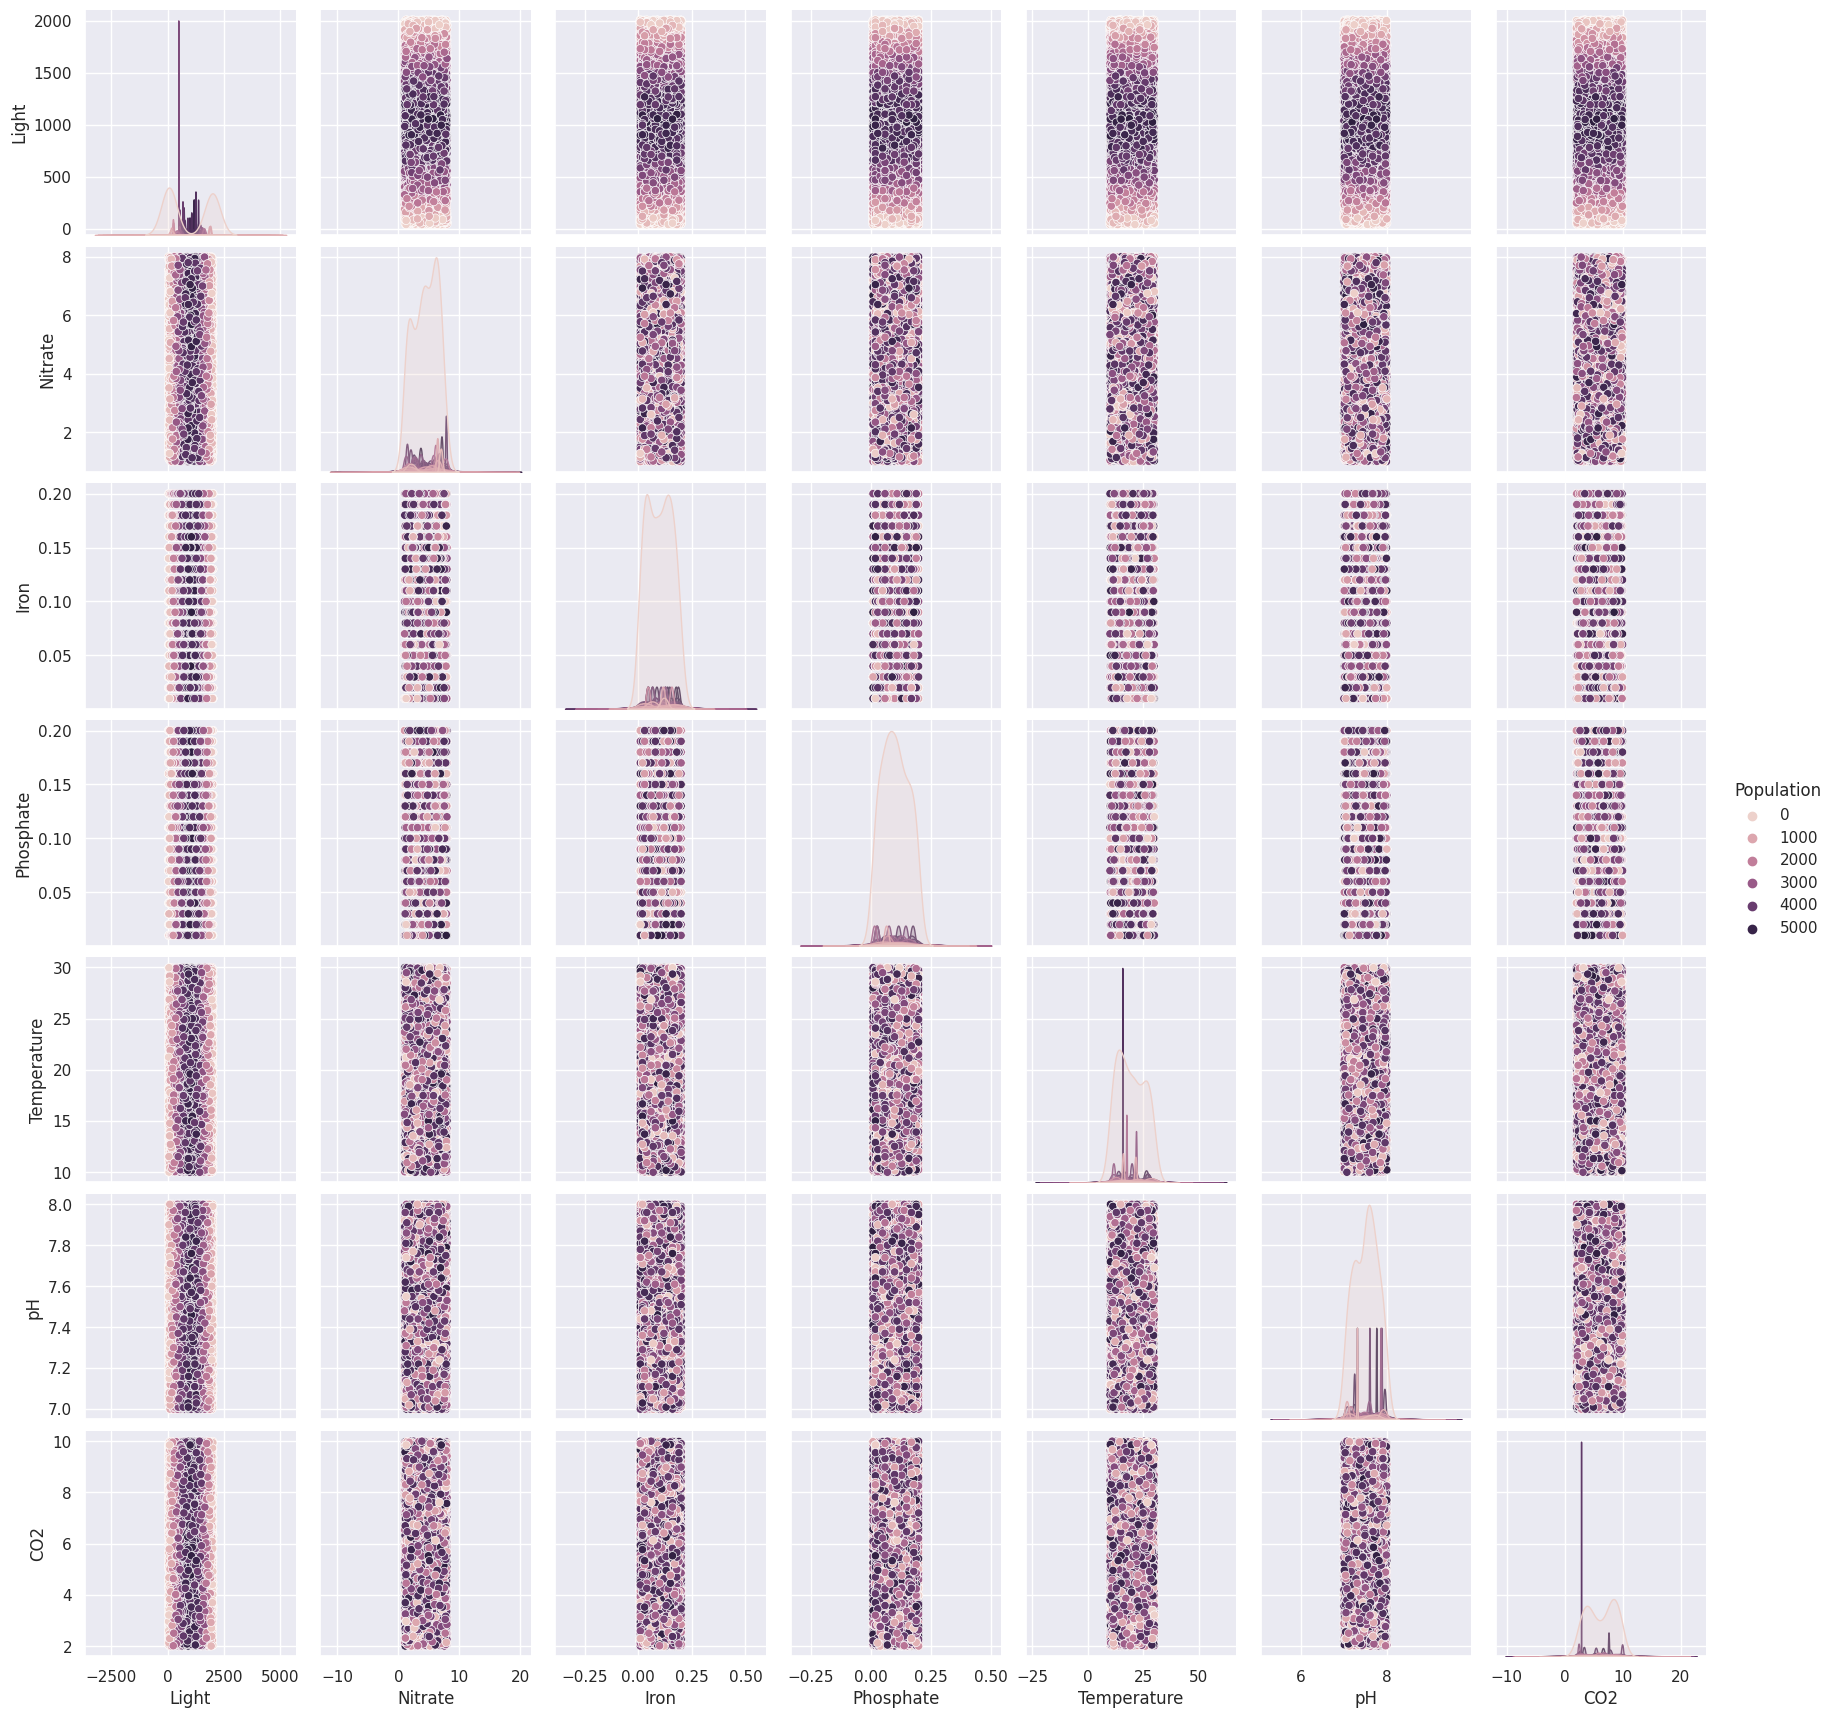

In [ ]:
sns.set_theme(style="darkgrid")
#pairplot shows relationship between each column
sns.pairplot(df, hue="Population")

Pairplot produces the graph of each of the features toogether. This particular shows very little in terms of correlation. The only semi interesting point is light which seems to be the only column thats not random. It shows a higher population at a median value and spreads out fairly evenly on all both sides. Suggesting that light may have the biggest effect on population.

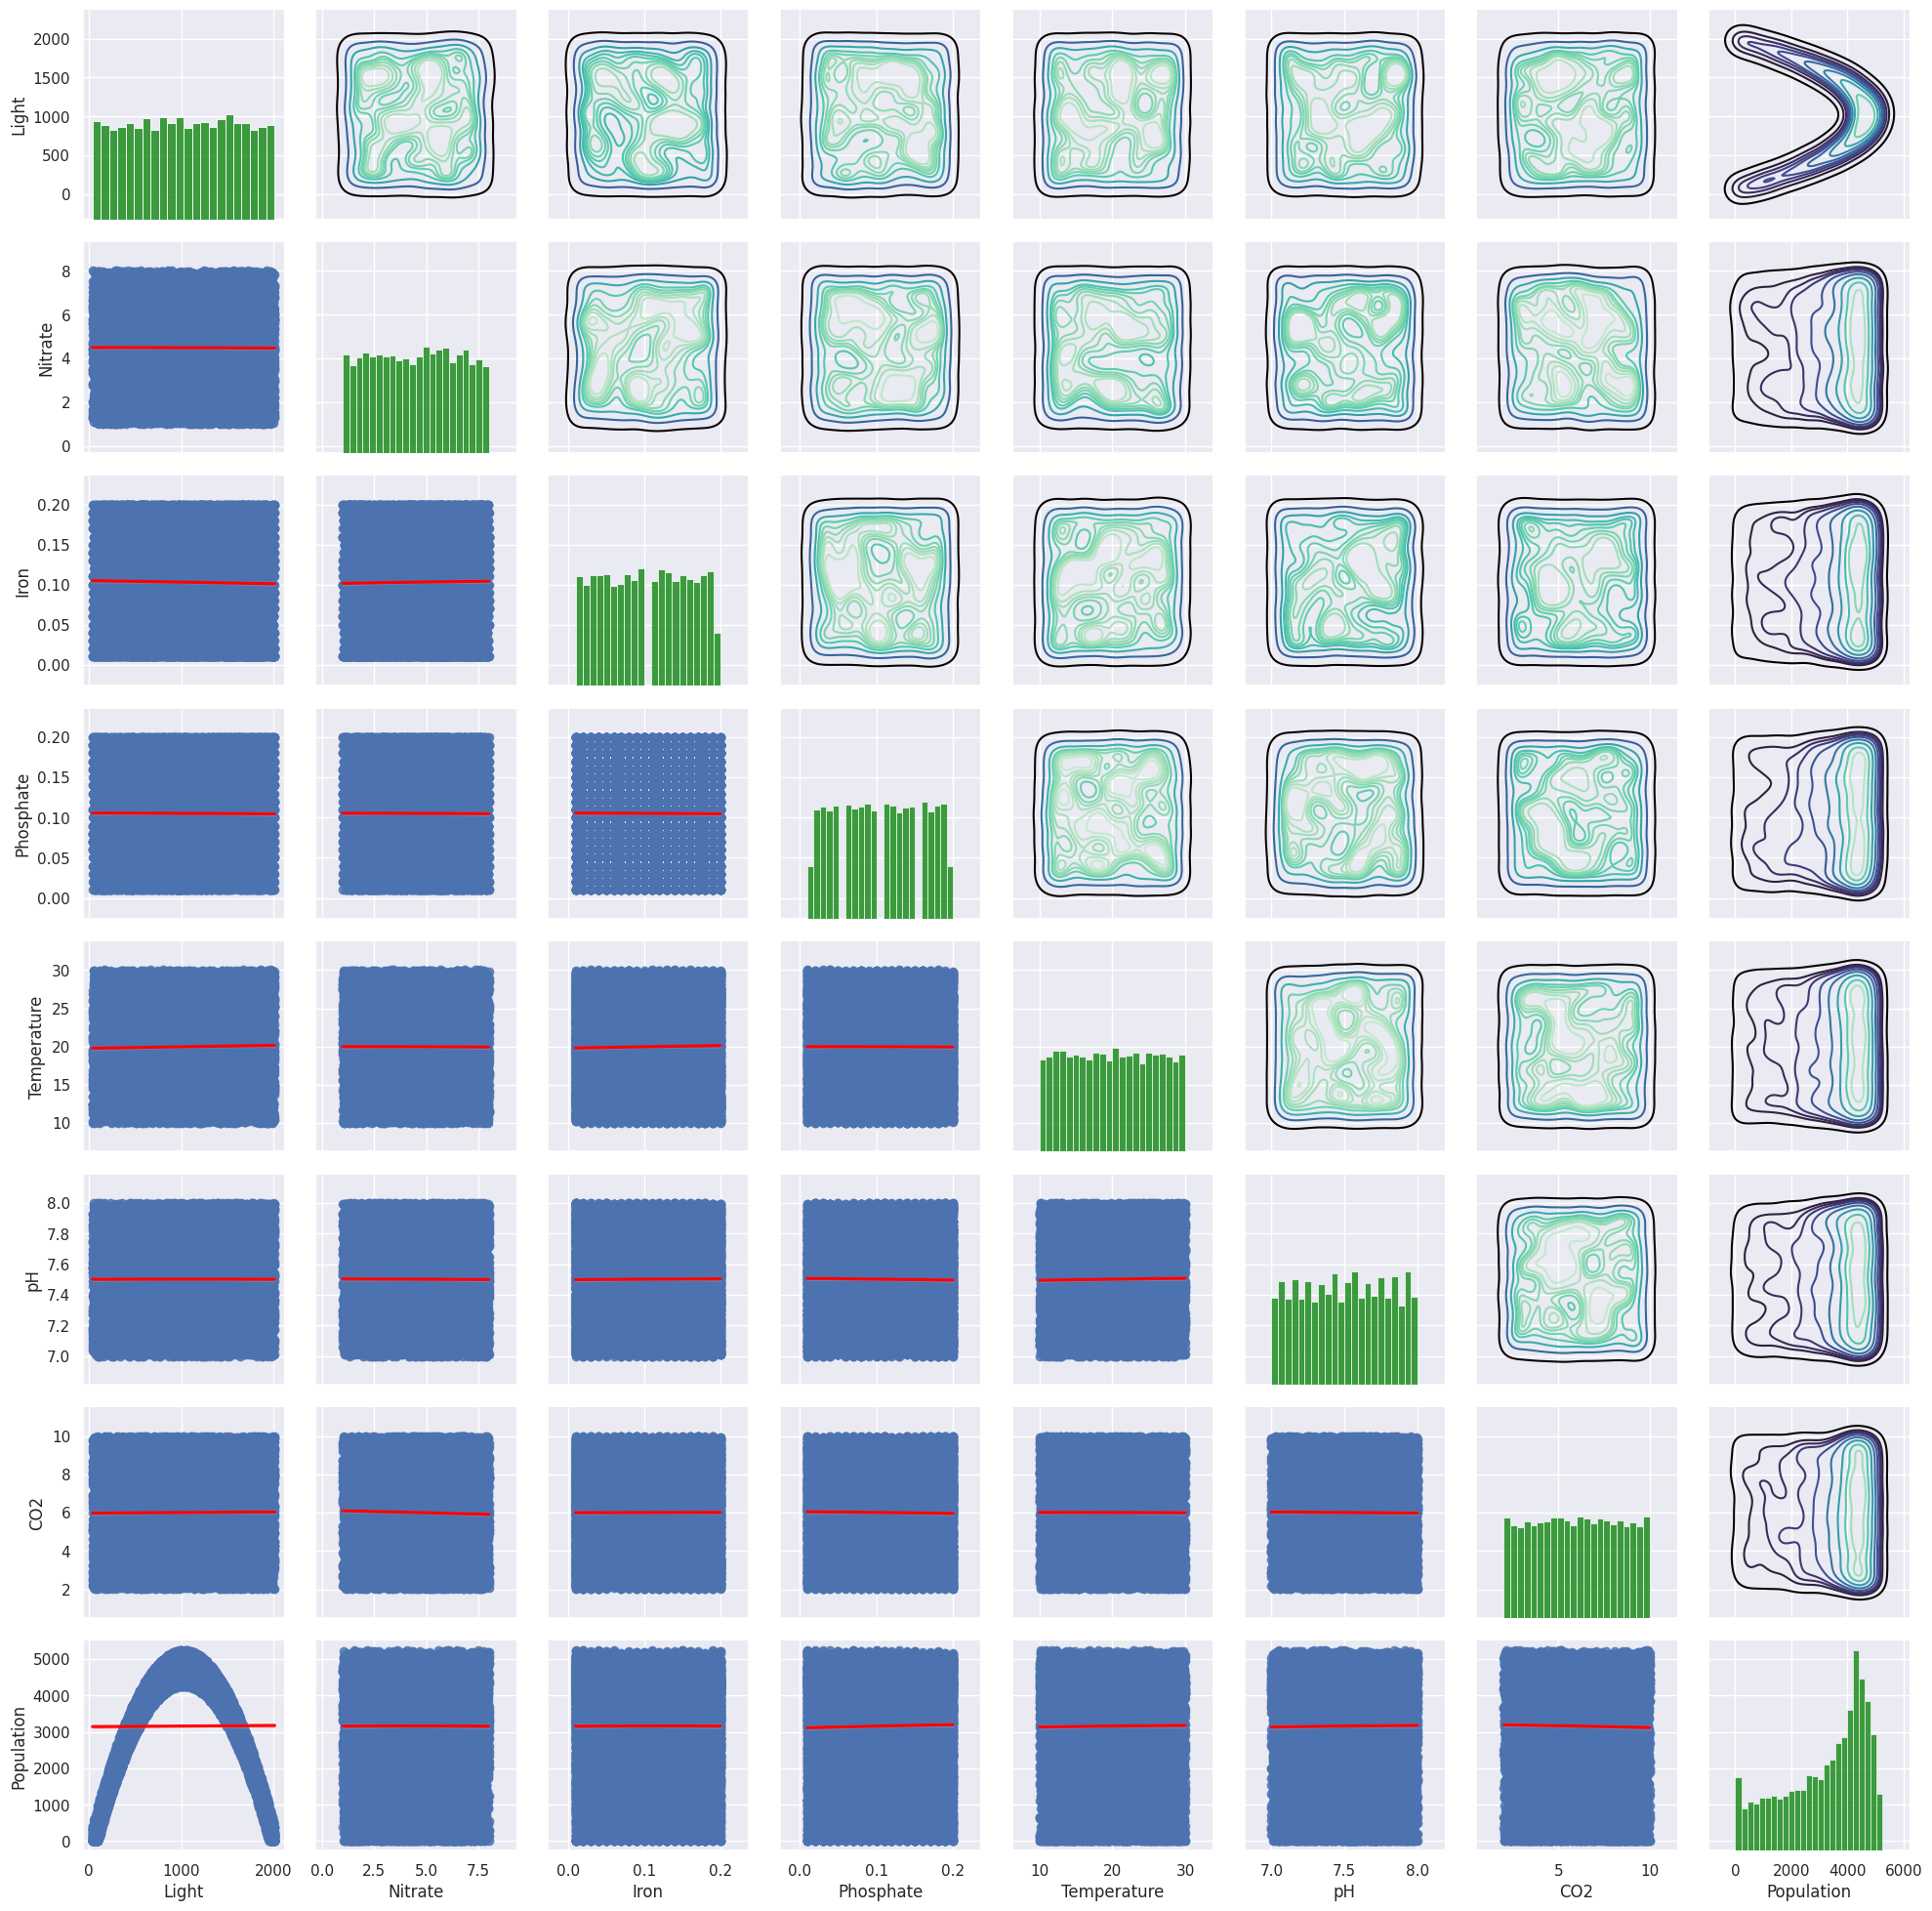

In [ ]:
#creates Pairgrid, sets the parameters which include, histograms, regplots and kdeplot with their position
g = sns.PairGrid(df)
g.map_upper(sns.kdeplot, cmap = "mako")
g.map_lower(sns.regplot, line_kws = {"color":"red"})
g.map_diag(sns.histplot, color = "green")
g.fig.show()

PairGrid presents similar information to the pairplot. This time population is included as a variable and you can see the normal distribution shape of light vs population especially compared to the uncorrelated plots. Due to the lack of a linear correlation present it is unlikely a linear regression model will have a good accuracy.

##Correlation Matrix

<Axes: >

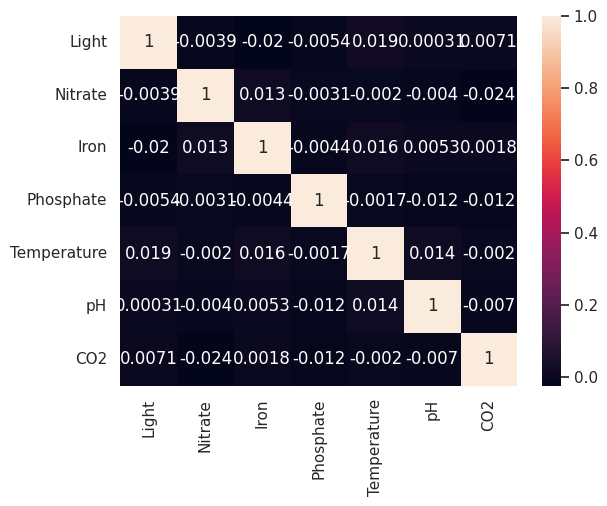

In [ ]:
#seaborn heatmap for x features
sns.heatmap(X.corr(), annot=True)

<Axes: >

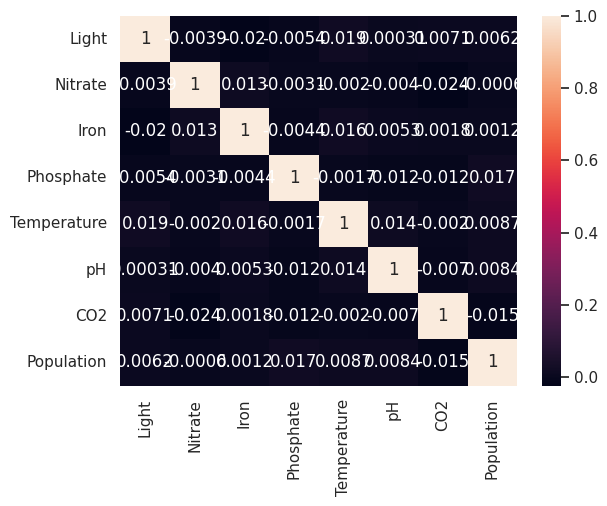

In [ ]:
#seaborn heatmap for entire df
sns.heatmap(df.corr(), annot=True)

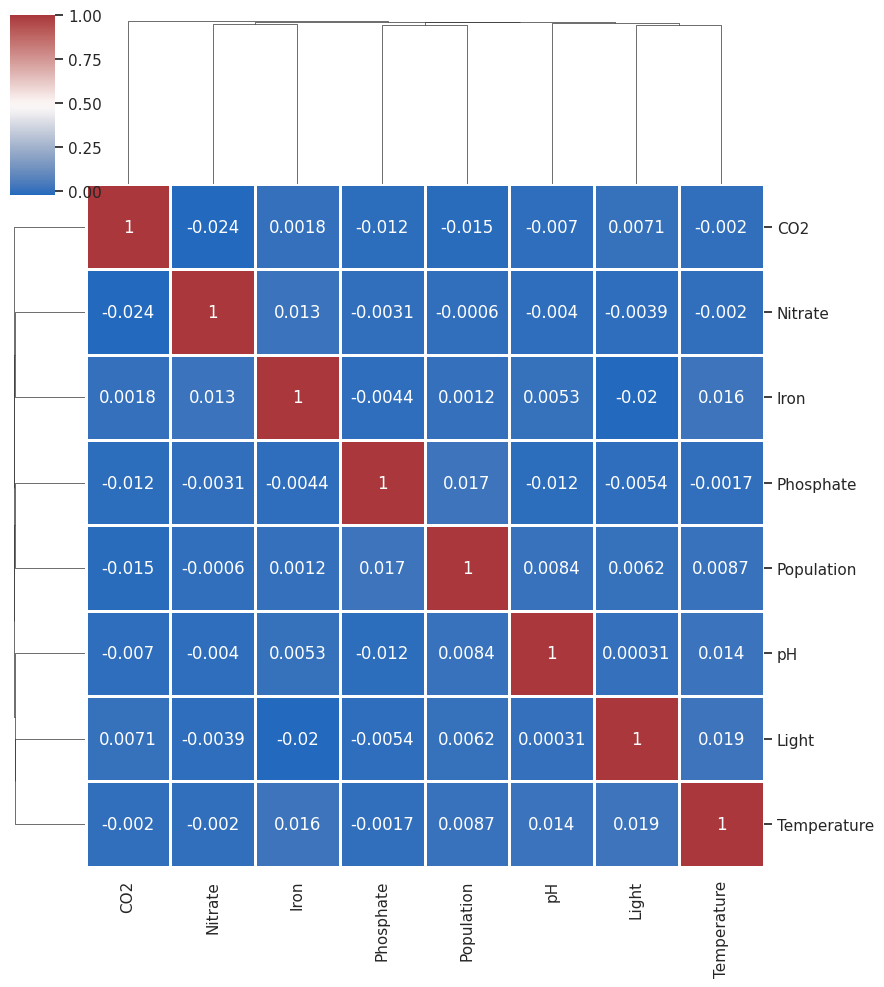

In [ ]:
#seaborn clustermap to display correlation matrix
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidth = .8, figsize = (9, 10));

The various correlation matrices verify the lack of a correlation. Whre the is not a single correlation at greater than 0.1 or less than 0.1.

In [ ]:
#show the correlation with population as a df
df_corr = df.corr(method = "spearman")[["Population"]].abs()
df_corr = df_corr.sort_values("Population", ascending = False)
df_corr = df_corr.iloc[1:,:]
df_corr.style.background_gradient(cmap = "coolwarm")

These two plots taken from BRYAM BLAS RIMAC on the same dataset uploaded to Kaggle. The correlation removes any repeating information and scales the correlation based on the data where Phosphate has the highest correlation with population and Nitrate the lowest but it is still less than 0.1 meaning it has very poor correlation for linear regression.

##Linear Regression Processing

In [ ]:
#perform pca on the x data
pca = PCA(n_components=7)
X2 = pca.fit_transform(X)
X2

array([[ 1.51721137e+01,  3.41714122e+00, -3.49033998e+00, ...,
         2.33705022e-01,  6.97023690e-02,  1.91308371e-02],
       [-1.80326187e+02, -5.27229966e+00, -3.65951943e+00, ...,
        -4.43867328e-01,  4.34305354e-02,  5.97369402e-02],
       [-4.24458738e+02,  8.52633539e+00,  1.30850000e+00, ...,
         1.61126102e-01, -5.44487939e-02,  9.10825672e-02],
       ...,
       [-8.72276875e+02, -1.61391416e+00, -1.95698842e+00, ...,
         1.11240685e-01,  1.47676143e-02,  5.37372910e-02],
       [-8.05927525e+02,  2.49858816e+00,  1.39056038e+00, ...,
         4.64284819e-01,  4.58878056e-02, -2.80586966e-02],
       [ 5.58454675e+02, -8.34626329e+00,  3.21196676e+00, ...,
         1.27098268e-01,  2.03945552e-02,  4.48670783e-02]])

To showcase the data with linear regression it is transformed and scaled using PCA which would help prevent overfitting if this data was any bit correlated.

In [ ]:
y = df['Population']

In [ ]:
#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.4)

Split the data with a 60 40 train test split

Score: -0.0008839208417408262
MAE: 1255.4948495017932
MSE: 2172535.4268537625
RMSE: 1473.9523149863983


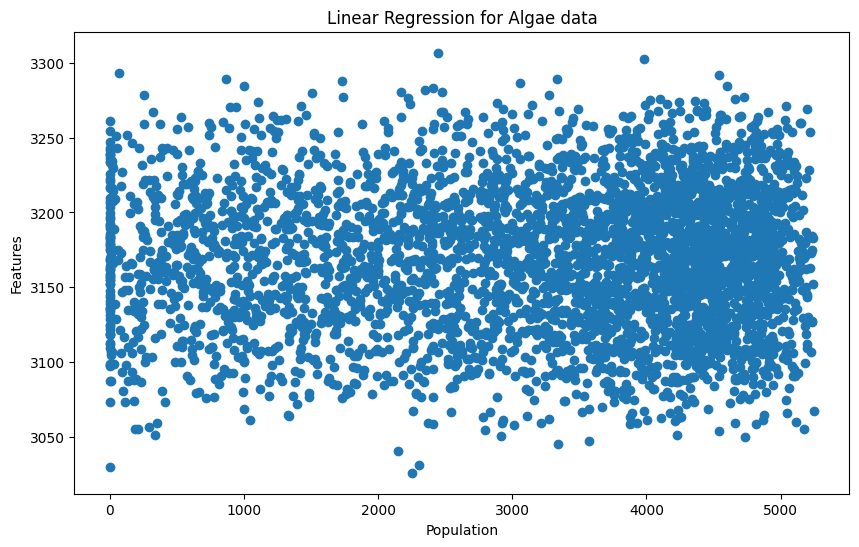

In [ ]:
#creates linear model
clf = LinearRegression()
#fits training and tests it
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))

#produces scatter graph
plt.figure(dpi=100, figsize=(10,6))
plt.title("Linear Regression for Algae data")
plt.xlabel("Population")
plt.ylabel("Features")
plt.scatter(y_test, predictions)

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))


A bare bones linear regression produces a negative score it is that bad for predicting values. The MAE, MSE and RMSE are also extremely high further showing how bad this data is for Linear Regresison.

3168.2401840762113
[ 1.19108284e-02  8.24250444e-01  1.23853237e+01  8.45209479e+00
 -6.48968978e+00 -6.44428922e+01 -6.08032018e+02]


<BarContainer object of 7 artists>

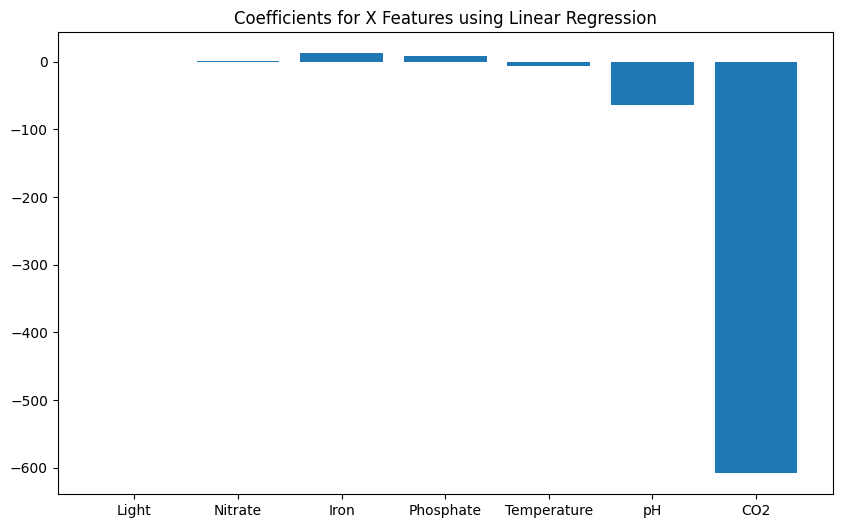

In [ ]:
print(clf.intercept_)
print(clf.coef_)
#plot the coeffs for linear regression
plt.figure(dpi=100, figsize=(10,6))
plt.title("Coefficients for X Features using Linear Regression")
plt.bar(X.columns, clf.coef_)

You can see from the coefficents graph that it chose CO2 as the main feature to use as it was one of the highest correlated points even tho it was extremely low in terms of correlation as well. It is also took into account temperature and pH more than other variables as they had the next highest correlation. It negelected to use Phosphate even tho it had the highest but as the correlation was low, it wouldn't have made a difference.

###Lasso Linear Regression

Score: -0.0004881327038008809
MAE: 1247.7403475751028
MSE: 2146062.507959254
RMSE: 1464.9445409158855


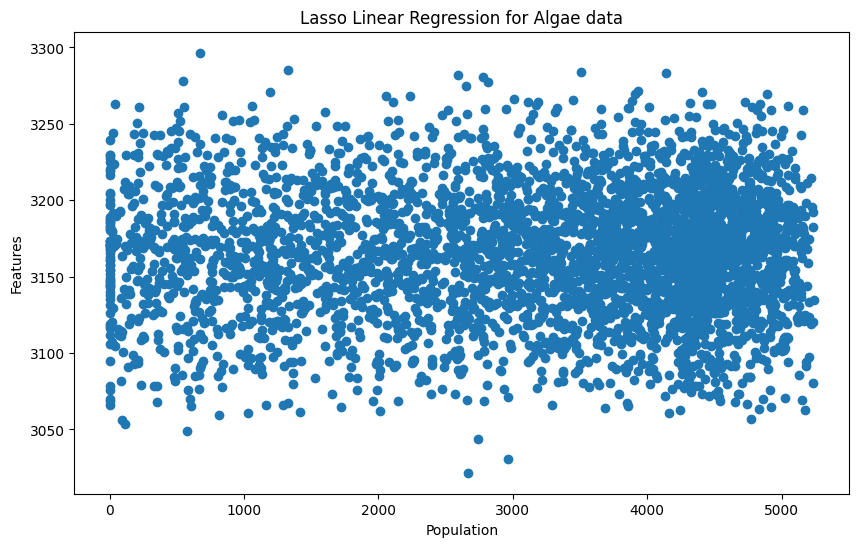

In [ ]:
#creates the lasso linear model
clf = Lasso()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

#graphs the scatter
plt.figure(dpi=100, figsize=(10,6))
plt.title("Lasso Linear Regression for Algae data")
plt.xlabel("Population")
plt.ylabel("Features")
plt.scatter(y_test, predictions)

Lasso Linear Regression pushes the weights towards zero which can be seen with the reduction in the range on the features and the reduction in score and other metrics even if very minimal

[-2.70537807e-02  3.69675147e+00  9.85724640e+00 -3.00061065e+00
 -6.02941742e+01 -4.08543660e+01 -2.75003874e+02]


<BarContainer object of 7 artists>

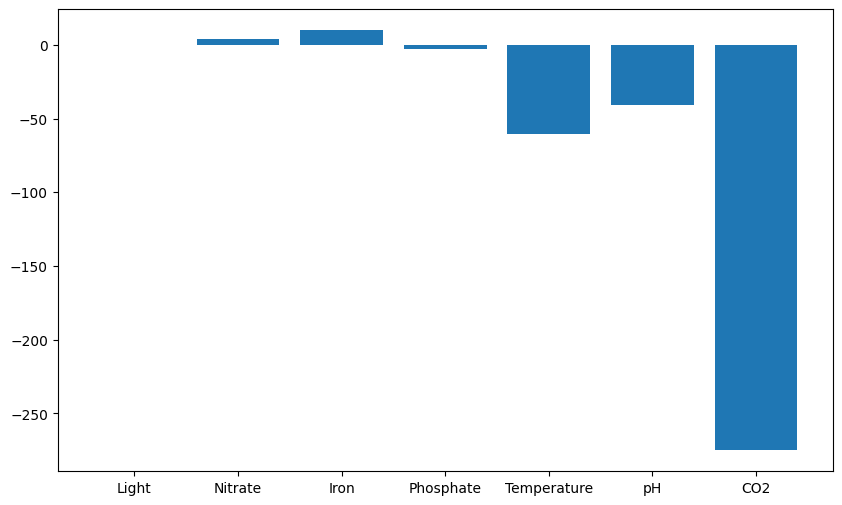

In [ ]:
print(clf.coef_)
plt.figure(dpi=100, figsize=(10,6))
#plots the coeffs
plt.title("Coefficients for X Features using Lasso Linear Regression")
plt.bar(X.columns, clf.coef_)

Small reduction that is not readily apparent to the naked eye.

###Ridge Linear Regression

Score: -0.0013474803157511595
MAE: 1247.9941679356057
MSE: 2147905.8218687624
RMSE: 1465.5735470691202


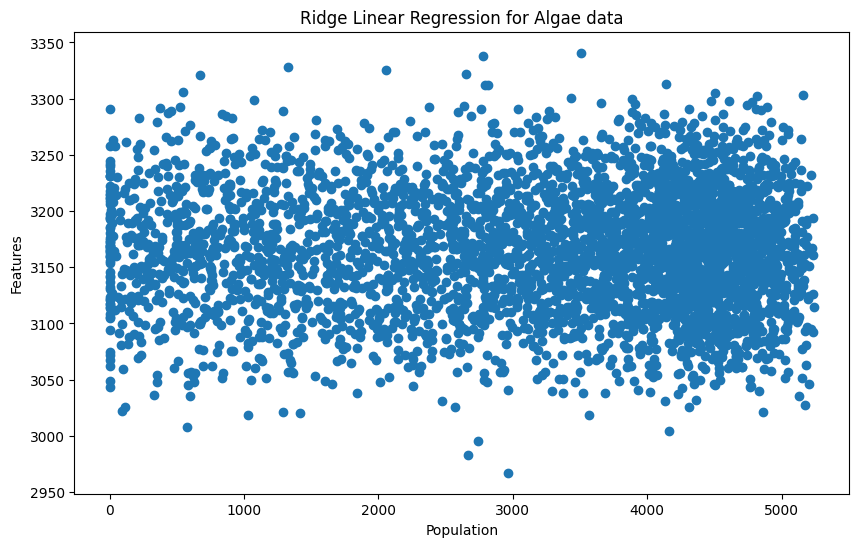

In [ ]:
#creates a ridge linear model
clf = Ridge()
#trains and tests the data
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

#graphs the scatter
plt.figure(dpi=100, figsize=(10,6))
plt.title("Ridge Linear Regression for Algae data")
plt.xlabel("Population")
plt.ylabel("Features")
plt.scatter(y_test, predictions)

Ridge Linear Regression may be worse than standard linear regression as it produces an almost identical graph with a slighly better score but worse metrics.

[-2.69708427e-02  3.66153770e+00  9.96090680e+00 -3.22663681e+00
 -7.26547359e+01 -3.37168086e+02 -5.73676040e+02]


<BarContainer object of 7 artists>

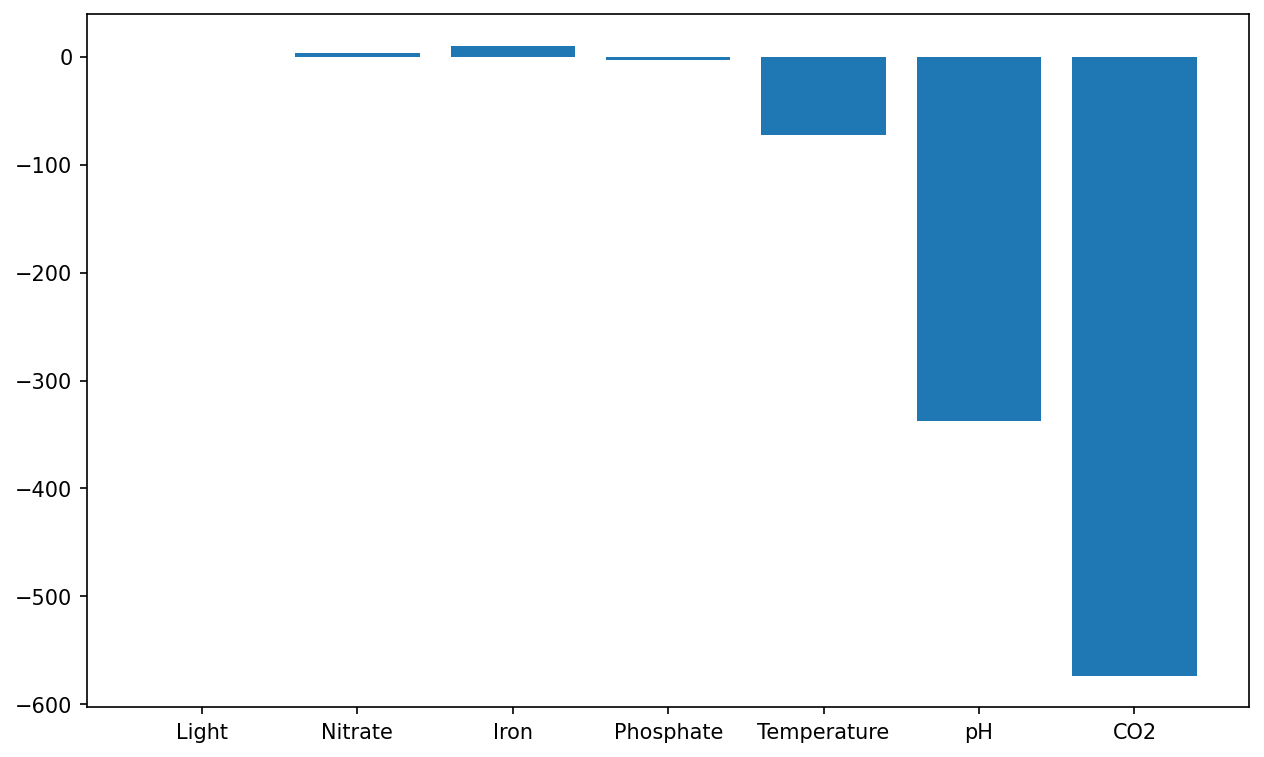

In [ ]:
#graphs the coefficients
print(clf.coef_)
plt.figure(dpi=150, figsize=(10,6))
plt.title("Coefficients for X Features using Ridge Linear Regression")
plt.bar(X.columns,clf.coef_)

Ridge adds a penalty hyperparameter which made the values of pH, temperature and CO2 closer but massively increased the overall coefficent values to do so which makes it quite poor in the grandscheme.

###Elastic Net Regression

Score: -0.0003188971922527539
MAE: 1247.7974139333426
MSE: 2145699.4951713188
RMSE: 1464.8206358361144
Score: -0.0003188971922527539


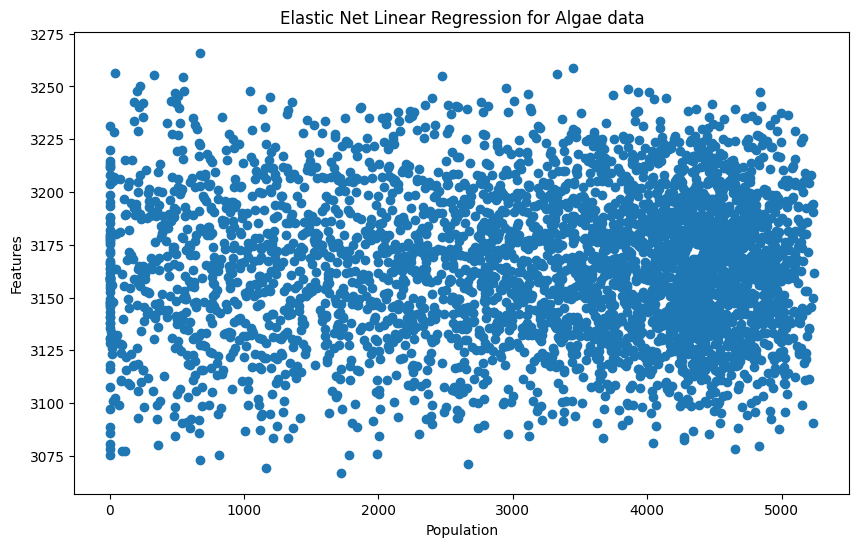

In [ ]:
#creates an elastic net model
clf = ElasticNet()
#trains and tests the model
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))

# Different error measures
print("MAE:", mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

#Outputs the scatter plot
print("Score:", clf.score(X_test, y_test))
plt.figure(dpi=100, figsize=(10, 6))
plt.title("Elastic Net Linear Regression for Algae data")
plt.xlabel("Population")
plt.ylabel("Features")
plt.scatter(y_test, predictions)

Elastic Net combines the benefits of Ridge and Lasso and in this case it has reduced the range of the features abd score but the other metrics have remained at the more or less the same values.

[-0.02717933  3.70205667  9.16364656 -2.74188179 -9.3963625  -1.24618316
 -2.64294843]


<BarContainer object of 7 artists>

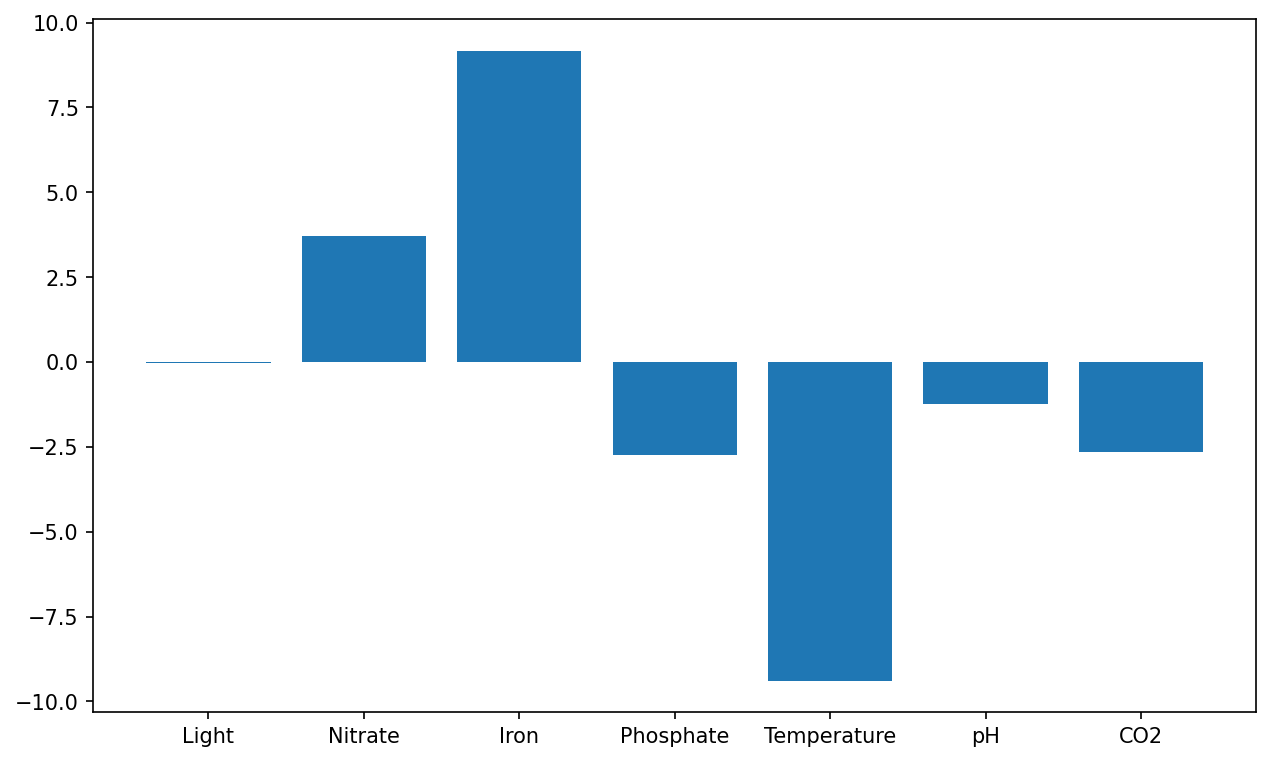

In [ ]:
#graphs the coefficients
print(clf.coef_)
plt.figure(dpi=150, figsize=(10,6))
plt.title("Coefficients for X Features using Elastic Net Linear Regression")
plt.bar(X.columns,clf.coef_)

Looking at the coefficents for Elastic Net, it features a dramatic change in the way it has switched temperature and Iron to the strongest features and made it a lot more balanced overall with a smaller range. Obviously this is good but with how little correlation present at the start there was only so much it could be increased by.

###Alternative Linear Regression

In [ ]:
def linReg(df, X1):
  X = df[X1]
  y = df["Population"]
  X = sm.add_constant(X)

  # set 4the initialization 1.0 of the linear 55 regression calculation
  linear_regression = sm.OLS(y,X)
  # estimation of the regression coefficients β
  fitted_model = linear_regression.fit()
  fitted_model.summary()

  betas = np.array(fitted_model.params)
  fitted_values = fitted_model.predict(X)

  x_range = [df[X1].min(),df[X1].max()]
  y_range = [df['Population'].min(),df['Population'].max()]
  scatter_plot = df.plot(kind='scatter', x=X1, y='Population', xlim=x_range, ylim=y_range)
  meanY = scatter_plot.plot(x_range, [df['Population'].mean(),df['Population'].mean()], '--', color='red', linewidth=1)
  meanX = scatter_plot.plot([df[X1].mean(),df[X1].mean()], y_range, '--', color='red', linewidth=1)
  # Use the predict method to project the fitted predictions on our previous scatterplot to allow us to
  # visualize the price dynamics in respect of our predictor, the average number of rooms
  regression_line = scatter_plot.plot(df[X1], fitted_values, '-', color='orange', linewidth=1)
  plt.grid()
  # thanks to this graphical display, we can notice that the regression line exactly passes at the intersection of the x and y averages.
  return fitted_model



This function uses the statsmodel linear regression and produces metrics like r-squared and a graph for a specified individual feature.

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.162
Date:                Sat, 25 Nov 2023   Prob (F-statistic):              0.141
Time:                        13:56:46   Log-Likelihood:                -85170.
No. Observations:                9784   AIC:                         1.703e+05
Df Residuals:                    9782   BIC:                         1.704e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3218.3185     41.303     77.920      0.0

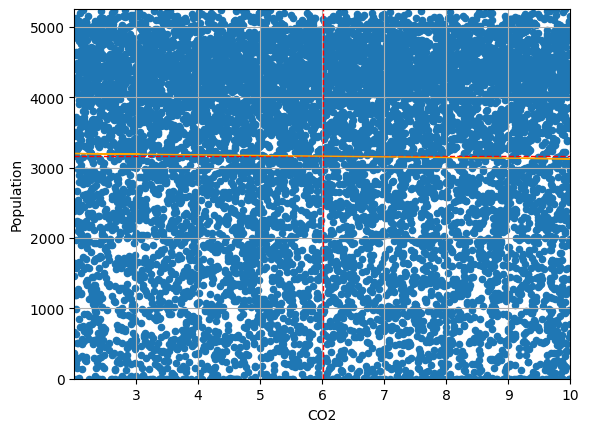

In [ ]:
print(linReg(df, "CO2").summary())

CO2 one of the highest correlations by itself shows no bearing on the population and r-square of 0.

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.825
Date:                Sat, 25 Nov 2023   Prob (F-statistic):             0.0928
Time:                        13:57:03   Log-Likelihood:                -85170.
No. Observations:                9784   AIC:                         1.703e+05
Df Residuals:                    9782   BIC:                         1.704e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3113.9846     31.941     97.493      0.0

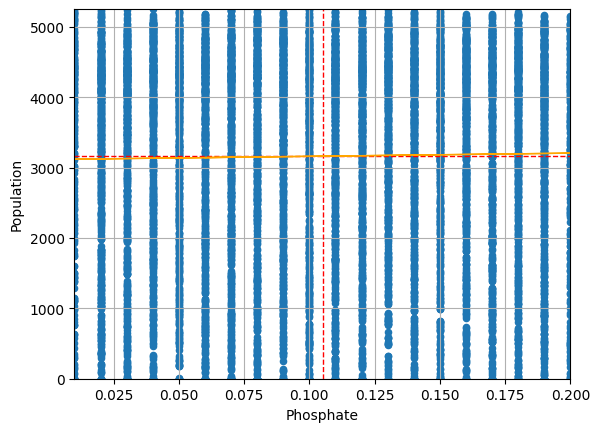

In [ ]:
print(linReg(df, "Phosphate").summary())

Phosphate is much similar to CO2 except the values are concentrated in straight lines around values but this is due to the scale used where Phosphate is only present in water in very small amounts.

                            OLS Regression Results                            
Dep. Variable:             Population   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3816
Date:                Sat, 25 Nov 2023   Prob (F-statistic):              0.537
Time:                        13:56:15   Log-Likelihood:                -85171.
No. Observations:                9784   AIC:                         1.703e+05
Df Residuals:                    9782   BIC:                         1.704e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3145.0411     30.597    102.790      0.0

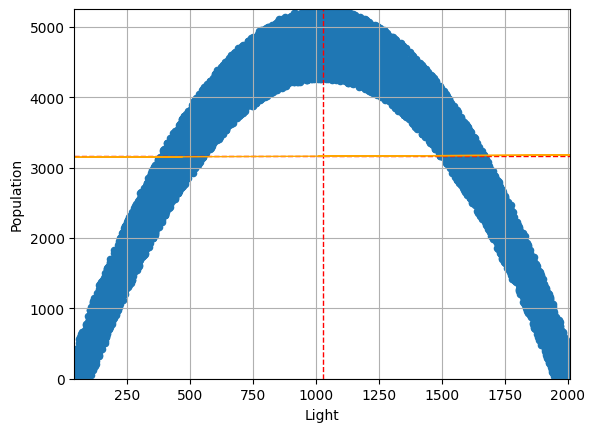

In [ ]:
print(linReg(df, "Light").summary())

Performing Linear Rgression on the afformentioned Light feature does not produce a good result for an r square score or good graph. The graph features a curve which means that polynomial regression may be able to produce an adequete score.

Due to the lack of correlation linear regression is an terrible choice as a model for this data.

###Polynomial Regression

Polynomial regression is a variation of linear regression that aims to fix issues where data does not follow a linear relationship, where the target value increases and decreases based on the features. Values are squared, cubed, power of 4 etc.

In [ ]:
#initial values for comparison
rmse= []
degrees = np.arange(1,11)
min_rmse , min_value = 1e10, 0

#function compares the RMSE at different degree intervals
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)

    # Create and train a linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    X_poly_test = poly_features.fit_transform(X_test)

    # Make predictions
    y_pred = model.predict(X_poly_test)

    # Calculate RMSE
    mse = mean_squared_error(y_test, y_pred)
    current_rmse = np.sqrt(mse)

    # Store RMSE values
    rmse.append(current_rmse)

    # Check if this is the model with the lowest RMSE
    if current_rmse < min_rmse:
        min_rmse = current_rmse
        min_degree = degree

#Outputs the values
print("RMSE values for polynomial degrees 1 to 10:", rmse)
print("Minimum RMSE:", min_rmse)
print("Degree with minimum RMSE:", min_degree)

RMSE values for polynomial degrees 2 to 5: [1473.9523149863983, 287.0889587059906, 288.77571105506433, 294.3660712573766, 307.2605480795997, 310.52159323580383, 377.6205198182133, 336.47766741971446, 669.343866989492, 454.8039668905006]
Minimum RMSE: 287.0889587059906
Degree with minimum RMSE: 2


Performing polynomial regression reveals that the best degree to use is 2.

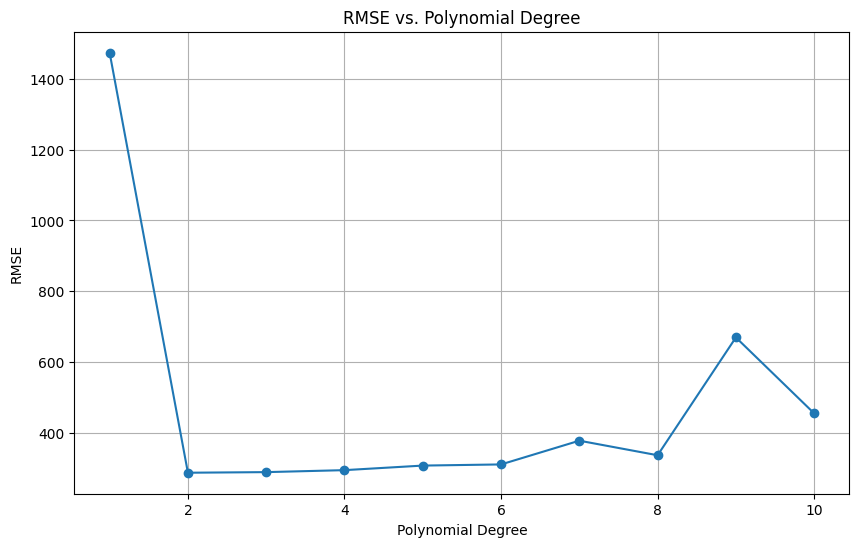

In [ ]:
#shows the rmse at different degrees
plt.figure(figsize = (10,6))
plt.plot(degrees, rmse, marker='o')
#titles and labels
plt.title('RMSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Plots the RMSE at different degrees for polynomial regression. Linear is seen in the first degree with its high score and changing to two degrees brings the RMSE down massively. It slowly increases for 2 showing it is the best degree to use.

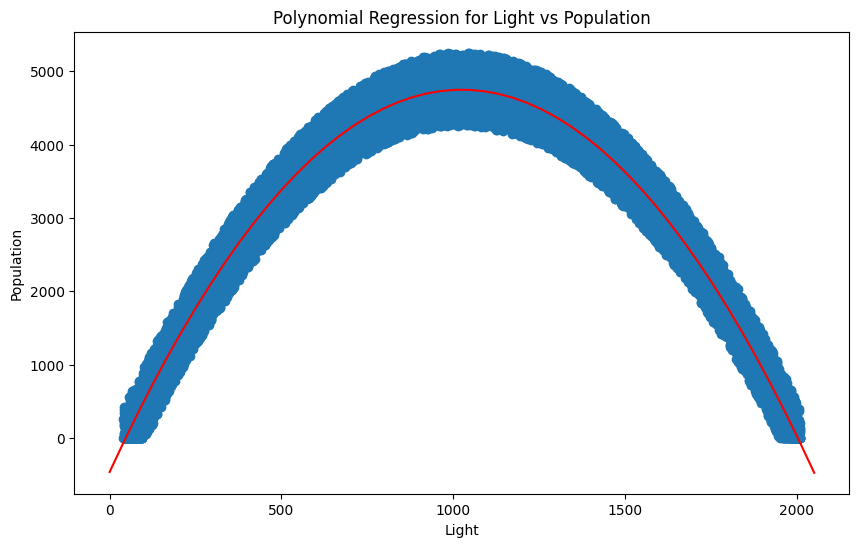

R2-Score 0.9613436349626262


In [ ]:
#fits a polyline of 2 degrees to the light feature
mymodel = np.poly1d(np.polyfit(X['Light'], y, 2))

myline = np.linspace(0, 2050)

plt.figure(figsize = (10,6))
plt.scatter(X['Light'], y)
plt.plot(myline, mymodel(myline), 'r')
#title and labels
plt.title("Polynomial Regression for Light vs Population")
plt.xlabel("Light")
plt.ylabel("Population")

plt.show()
#r2 score for the below graph
print("R2-Score", r2_score(y, mymodel(X['Light'])))

Polynomial regression can be seen graphed for Light above. As stated previosly light increases to a point before decreasing the population and as this is only one point, the afformentioned 2 degrees of polynomial works best with the red line indicating the poly curve and expected values. This produces an R2-score of 0.96 which is 96% of the relationship accounted for in the model. showing it has been a success especially compared to the linear relationships.

In [ ]:
#fits and transforms the x training data to the poly degree of 2
poly_degree = PolynomialFeatures(degree = 2)
X_train_pol = poly_degree.fit_transform(X_train)
#transforms the testing data
X_test_pol = poly_degree.transform(X_test)

In [ ]:
PR = LinearRegression()
#fits the training data
PR.fit(X_train_pol, y_train)
#tests the test data
y_pred_PR = PR.predict(X_test_pol)
mse_PR = mean_squared_error(y_test, y_pred_PR)# Calculate the Mean Squared Error (MSE)
# Print the scores for Polynomial Regression
print(f"Polynomial Regression MSE: {mse_PR}")
print(f"Polynomial Regression Score on test: {PR.score(X_test_pol, y_test)}")
print(f"Polynomial Regression Score on train: {PR.score(X_train_pol, y_train)}")
print("\n")


Polynomial Regression MSE: 82420.07021088999
Polynomial Regression Score on test: 0.9620291931680063
Polynomial Regression Score on train: 0.9609156963638199




This performs the same polynomial regression task on the whole set of features not just light and predicts the correct result 96% of the time.

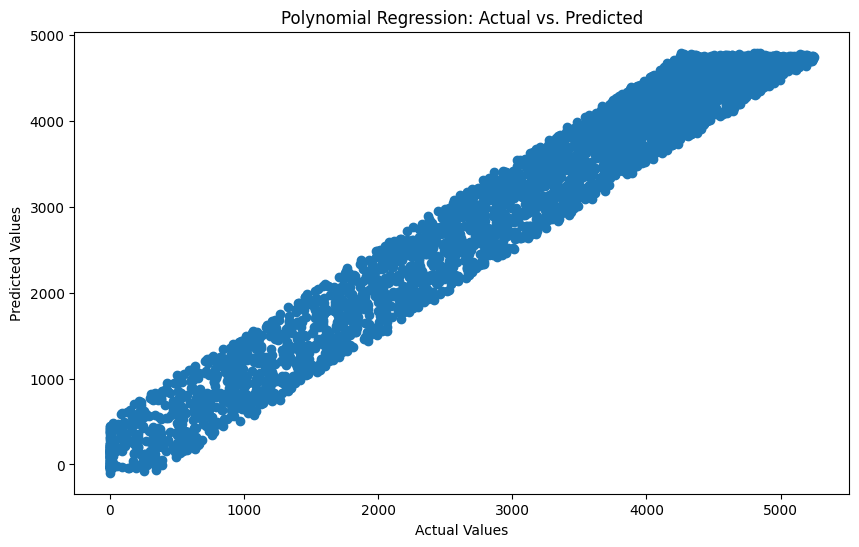

In [ ]:
plt.figure(dpi=100, figsize=(10,6))
plt.title("Polynomial Regression: Actual vs. Predicted")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.scatter(y_test, y_pred_PR)

# Display the plot
plt.show()

Graphing the values predicted vs the actual values shows that the values are correct. This displays a linear relationship showing how it is accurate.

##Ensemble

Ensemble methods use multiple machine learning models to produce an overall predictive model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.4)

###Model Creation

In [ ]:
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
knn = KNeighborsRegressor()
gbr = GradientBoostingRegressor()
vr = VotingRegressor(estimators = [('rf', rf), ('et', et), ('knn', knn), ('gbr', gbr)])
#vr = vr.fit(X_train, y_train)

models = {"KNN":knn,
          "ExtraTrees":et,
          "RandomForest":rf,
          "GradientBoost": gbr,
          "Voting Classifier": vr}

Create the various models that will be used for the ensemble.
Random Forest - Constructs multiple decision trees and obtaining the best values from them.

Extra Trees - its a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

KNN - K-Nearest Neighbour -a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point

Gradient Boosting Regressor - target outcomes for each case are set based on the gradient of the error with respect to the prediction. Each new model takes a step in the direction that minimizes prediction error

Voting Classifier- Is the ensemble method that combines the previous models into one that accounts for the strenghts and weaknesses displayed by the models.

###Model Training

In [ ]:
#Stores dictionaries of the r2, rmse and predicts for df creation for graphing
r2_train = {}
r2_test = {}

rmse_train = {}
rmse_test = {}

preds_train = {}
preds_test = {}

#Loops the models createed
for model_name, model in models.items():
  #tracks time to fit
  start = time.time()
  # Fit model
  model.fit(X_train, y_train)
  end = time.time()
  print(f'* {model_name}: total training time = {end-start} seconds')

  # Predictions
  y_pred_train = model.predict(X_train)
  preds_train[model_name] = y_pred_train

  y_pred_test = model.predict(X_test)
  preds_test[model_name] = y_pred_test

  # R2 score
  r2_train[model_name] = r2_score(np.array(y_train), y_pred_train)
  r2_test[model_name] = r2_score(np.array(y_test), y_pred_test)


  # RMSE
  rmse_train[model_name] = np.sqrt(mse_train[model_name])
  rmse_test[model_name] = np.sqrt(mse_test[model_name])

* KNN: total training time = 0.01476597785949707 seconds
* ExtraTrees: total training time = 1.472538948059082 seconds
* RandomForest: total training time = 4.230091571807861 seconds
* GradientBoost: total training time = 2.2879481315612793 seconds
* Voting Classifier: total training time = 9.766419410705566 seconds


Each of the models are fitted to the traing data and then tested with the test data. Values are obtained for r2-score and rmse. The time each model takes to fit is showm. The voting classifier takes the longest as it combines the previous values.

###R2 Score

In [ ]:
#Create a train df and test df
df_r2_train = pd.DataFrame.from_dict(r2_train, orient = 'index').rename(columns = {0:'Train'})
df_r2_test = pd.DataFrame.from_dict(r2_test, orient = 'index').rename(columns = {0:'Test'})
#Combine the dfs
df_r2 = pd.merge(df_r2_train, df_r2_test, left_index = True, right_index = True)
#Sort from the best score for training and testing
df_r2 = df_r2.sort_values(['Train', 'Test'], ascending = False)
df_r2

Train      Test
ExtraTrees         1.000000  0.956554
RandomForest       0.994081  0.957230
Voting Classifier  0.988578  0.958758
KNN                0.968782  0.953956
GradientBoost      0.965224  0.959885

The r2 score for each of the models shows for both train and test are shown. The extra trees model in training encompasses 100% of the relationship between features and drops about 4.5% to 95.5% in testing. Suggesting there is some overfitting taking place which is common with Extra Trees.

The other models all cover 96% to 99% of the relationship in training with the testing covering 95%. There could be some overfitting but it is quite small and likely a result of the various tree based models being used.

Gradient Boost has the smallest disparity between the training and testing. Voting Classifier is less than Extra Trees and Random Forest suggesting it has accounted for some of it overfitting in its model.

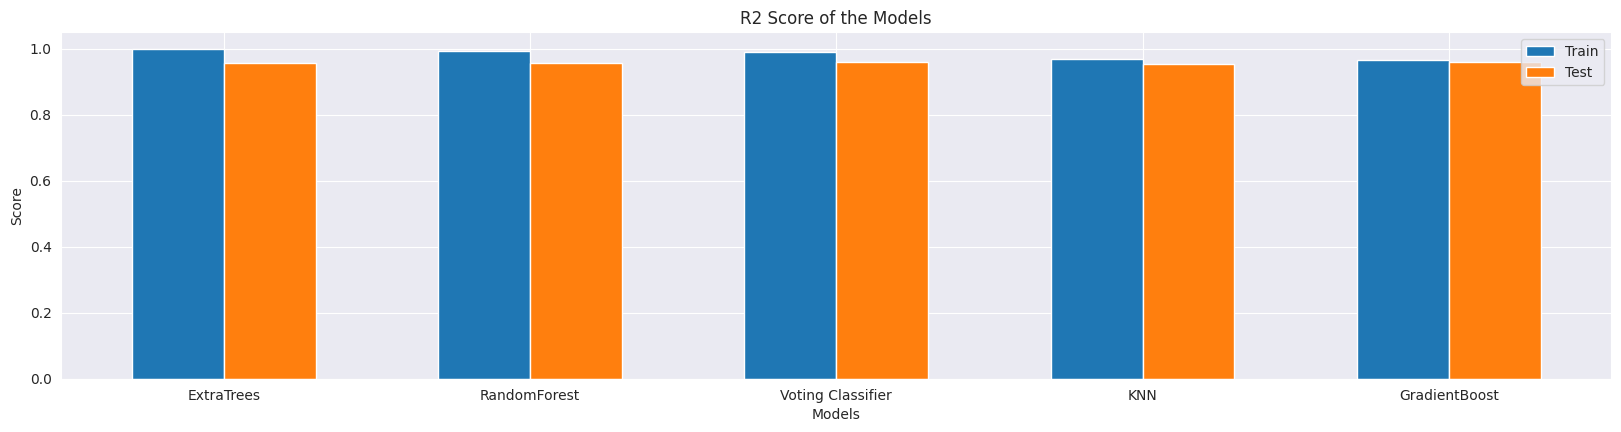

In [ ]:
#producing a double bar chart
fig,ax = plt.subplots(figsize = (20, 4.5))
#ensures the lenght is related to number of models
n = len(df_r2.index)
x = np.arange(n)
width = 0.3

#the first rec is based on train data and second is based on the test
rects1 = ax.bar(x = x-width, height = df_r2.iloc[:,0], width =width)
rects2 = ax.bar(x = x, height = df_r2.iloc[:,1], width = width)
ax.set_xticks(x-0.15, df_r2.index.to_list())
#labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('R2 Score of the Models')

#legend and show
ax.legend(["Train", "Test"])
fig.show()

Graphing the r2 scores as a double bar chart shows the consistent relationship across the models and visualises the information stated above about each of them.

###RMSE Score

In [ ]:
#creates a train and test df from the rmse dictionaries and combines them
df_rmse_train = pd.DataFrame.from_dict(rmse_train, orient = 'index').rename(columns = {0:'Train'})
df_rmse_test = pd.DataFrame.from_dict(rmse_test, orient = 'index').rename(columns = {0:'Test'})
df_rmse = pd.merge(df_rmse_train, df_rmse_test, left_index = True, right_index = True)
#sorts the values by trainining and testing with best values at the top
df_rmse = df_rmse.sort_values(['Train', 'Test'], ascending = True)
df_rmse.style.background_gradient(cmap = "coolwarm")

RMSE values for the training and testing values follow the same pattern as the r2 score where extra trees has overfitted as it is stated to get an rmse of 0 in training but in testing it is 305.

The other values also follow the same relationship with a low train score but higher test score. Gradient Boost again has the lowest change between train and test and voting classifier being lower than trees and forest shows it counting for the potential overfitting.

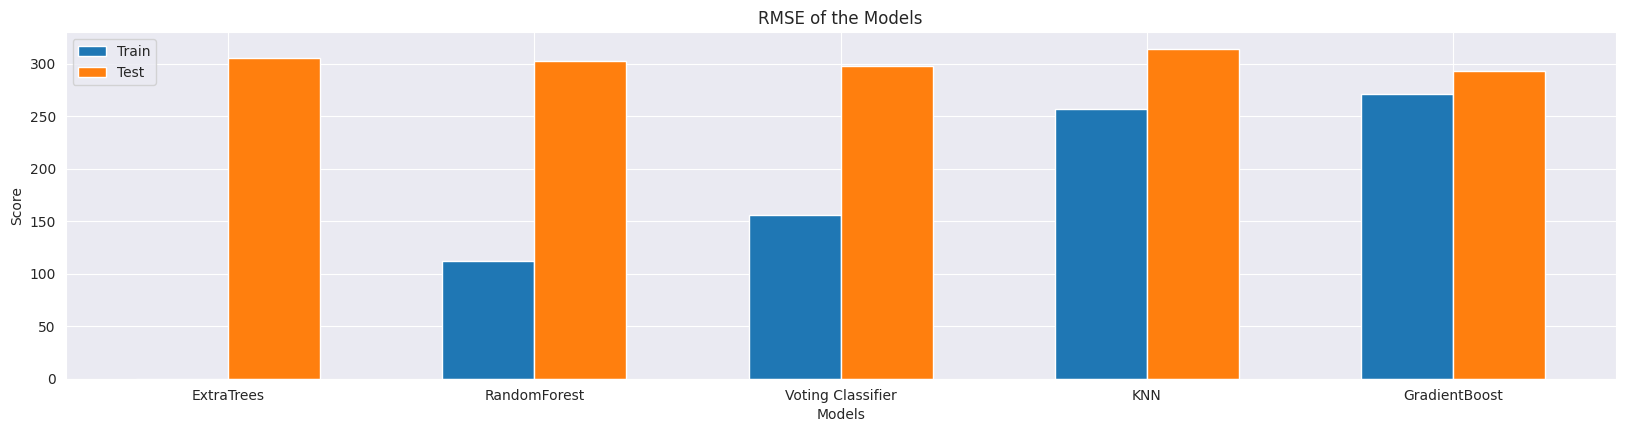

In [ ]:
#producing a double bar chart
fig,ax = plt.subplots(figsize = (20, 4.5))
#ensures the lenght is related to number of models
n = len(df_r2.index)
x = np.arange(n)
width = 0.3

#the first rec is based on train data and second is based on the test
rects1 = ax.bar(x = x-width, height = df_rmse.iloc[:,0], width =width)
rects2 = ax.bar(x = x, height = df_rmse.iloc[:,1], width = width)
ax.set_xticks(x-0.15, df_r2.index.to_list())
#labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('RMSE of the Models')

#legend and display
ax.legend(["Train", "Test"])
fig.show()

Because of the different scale used with RMSE, the bar chart shown looks quite different to the r2-score but  it conveys similar information to the r2 score just in the opposite way where train is lower and test is higher.

##Conclusion

Many models have been used to test the algae data. The data was examined under different measures of central tendencies and visualisations. From there various linear regression models were investigated. These models produced poor results due to the low linear correlation in the data. Upgrading the linear model to a polynomial model produced a model with 96% accuracy. This was seen in the Light parameter which increased to a point but then began decreasing.

Using Ensemble, Random Forest, Extra Trees regressor, KNN and Gradient Boosting regressor combine in the voting regressor. These models all produced similar results of roughly 97% to 98% in training and 96% in testing. Some of the models had greater disparity in the training and testing results showing that some overfitting especially in the forest and tree based models.

The voting regressor ended up producing a train/test model of 99%/96%, this likely took into account some of the overfitting to produce a more accurate model.

Overall most models ended up with an accuracy of 96% and given the context of predicting algae population this value would be more than acceptable. In practice there are probably more factors that could influence the population that cannot be predicted with this model such as various information on the location, the flora and fauna also present in the area and human activities in te surrounding area. These values would be a lot harder to quantify for a predictive model but the data provided should cover a majority of the information even outside a controlled environment.

In the end the overall model accuracies were high and could be used for their expanded further to be used to help regulate algae population if paired with the correct sensors and ability to control the variables in water.